# Data Visualization And Training Models
## In this notebook the preprocessed data are visualized on charts and ML models are learned. Furthermore model with the best statistic measure (for example accuracy) is picked to save into file.

### 1. Install necessary libraries

In [311]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from feature_extraction.feature_extraction import FeatureExtraction
from feature_extraction.utils import PatternCollector
from utils.measure_time import measure_time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

from matplotlib.container import BarContainer

### 2. Load preprocessed data from files

In [312]:
path_to_phish_data_file = os.path.join('preprocessed_data', 'phish_data.csv')
path_to_non_phish_data_longer = os.path.join('preprocessed_data', 'non_phish_data_longer.csv')
path_to_non_phish_data_shorter = os.path.join('preprocessed_data', 'non_phish_data_shorter.csv')

In [313]:
df1_phish = pd.read_csv(path_to_phish_data_file, index_col='Unnamed: 0', encoding='utf-8')
df1_phish.rename(columns={'PHISH_URL': 'URL'}, inplace=True)

In [314]:
df1_phish.head()

,URL,label
0,https://ollx.1792836.xyz/captcha,1
1,https://ufakick456.com/captcha,1
2,https://keyeseuropean.com/captcha,1
3,https://allegr0lokalnie.83473636.xyz/captcha,1
4,http://ufakick456.com/fb7pl5qw,1


In [315]:
df2_non_phish = pd.read_csv(path_to_non_phish_data_shorter, index_col='Unnamed: 0')
df2_non_phish.rename(columns={'NON_PHISH_URL': 'URL'}, inplace=True)

In [316]:
df2_non_phish.head()

,URL,label
0,https://releases.jquery.com/,0
1,https://code.jquery.com/,0
2,https://app.ether.fi/blocked,0
3,https://efty.com/d/2zfr2/NeonClaims.com/,0
4,https://www.yahoo.com/?&sid=74508,0


In [317]:
df1_phish.shape

(154832, 2)

In [318]:
df2_non_phish.shape

(443531, 2)

In [319]:
df_merged = pd.concat([df1_phish, df2_non_phish])
df_merged

,URL,label
0,https://ollx.1792836.xyz/captcha,1
1,https://ufakick456.com/captcha,1
2,https://keyeseuropean.com/captcha,1
3,https://allegr0lokalnie.83473636.xyz/captcha,1
4,http://ufakick456.com/fb7pl5qw,1
...,...,...
443567,https://imetrica.net/css/,0
443568,https://www.idxband.com/telin/images/e-online.php,0
443569,https://www.coffeewithsophieinc.com/media/syst...,0
443570,https://conseguircreditos.webs.tl/,0


In [320]:
df_merged.shape

(598363, 2)

In [321]:
df_merged.nunique()

URL      598227
label         2
dtype: int64

In [322]:
df_merged[df_merged['URL'].duplicated()]

,URL,label
5654,https://solcold.com/,0
5655,http://solcold.com/,0
5656,https://darkhost.pro:443/,0
5740,https://ciet-itac.ca/fr/user/login,0
5751,http://sistema.gavadent.com/admin/site/login,0
...,...,...
418611,https://webmail.genotec.ch/atmail/compose.php?...,0
422034,https://jaixnchoncolimited.yolasite.com/,0
428467,https://www.fifaonlineligen.com/cms_core/RELAT...,0
428469,https://www.fifaonlineligen.com/cms_core/CTYPE...,0


In [323]:
df_merged['URL'].duplicated().sum()

136

#### Drop duplicates:

In [324]:
df_merged.drop_duplicates(subset=['URL'], inplace=True, keep=False)

In [325]:
df_merged.nunique()

URL      598091
label         2
dtype: int64

In [326]:
df_merged.shape

(598091, 2)

### 3. Take equal number of rows from both DataFrames (in this example by 50.000 from each)

In [327]:
label1_filter = df_merged['label'] == 1
df_urls_1 = df_merged[label1_filter].sample(150_000)

In [328]:
df_urls_1.shape

(150000, 2)

In [329]:
df_urls_1.groupby('label').count()

,URL
label,
1,150000


In [330]:
label0_filter = df_merged['label'] == 0
df_urls_2 = df_merged[label0_filter].sample(150_000)

In [331]:
df_urls_2.shape

(150000, 2)

In [332]:
df_urls_2.groupby('label').count()

,URL
label,
0,150000


#### Merge DataFrames into  frame:

In [333]:
df_urls = pd.concat([df_urls_1, df_urls_2])

In [334]:
df_urls.shape

(300000, 2)

In [335]:
df_urls.groupby('label').count()

,URL
label,
0,150000
1,150000


In [336]:
df_urls.head()

,URL,label
124055,home.neopets.com/templates/homepage.phtml?pet_...,1
110763,www.islandnet.com/~canoes,1
61008,share.heropixphotography.com.au,1
16312,https://aabnepfrtis.firebaseapp.com/,1
130310,www.cs.utexas.edu/users/code/,1


In [337]:
df_urls.tail()

,URL,label
51012,https://williamjamison.com/,0
168302,https://http://xhamster.com/movies/4570137/chu...,0
365929,https://answers.com/topic/pride-prejudice-film-1,0
298636,https://footballdb.com/teams/nfl/san-diego-cha...,0
207457,https://en.wikipedia.org/wiki/Afrikan_Centered...,0


In [338]:
df_urls = df_urls.sample(len(df_urls))

In [339]:
df_urls.head(10)

,URL,label
432065,https://thombas.biz/xDcntrlde/_webscr.php?nxEX...,0
150076,www.interformic.com/he.html,1
26162,https://usp.usspvp.top/,1
362699,https://screenjunkies.com/movies/actors-direct...,0
68564,yipstas.com,1
60531,https://woodsculptures.ckchancollection.net/,0
54240,https://notquitenigella.com/2010/06/25/a-food-...,0
419282,https://www.id204-natwest.com/index.php?id=692226,0
369184,https://faqs.org/people-search/lafond-illinois/,0
13119,https://pub-50bae6e961394aaeaffc8b60a530ba91.r...,1


In [340]:
df_urls.tail(10)

,URL,label
123121,www.icann.org/en/udrp/,1
203650,https://rottentomatoes.com/celebrity/melissa_g...,0
6392,http://billiardpg.ir/Webmail/50/Webmail/webmai...,1
66862,overliefde.com,1
40019,https://new.express.adobe.com/webpage/KbWLF7JN...,1
151259,www.sniff.org/sega.html,1
85510,https://en.netlog.com/go/directory/people/01/m...,0
15369,http://best-soft.ru/programs/11938.html,0
99765,http://www.cashflowfxonline.com/wp-content/the...,1
409460,https://us.battle.net.login.en.vv-rs.com/login...,0


In [341]:
df_urls.shape

(300000, 2)

In [342]:
df_urls.groupby('label').count()

,URL
label,
0,150000
1,150000


#### Checking for nulls:

In [343]:
df_urls['URL'].isnull().sum()

0

In [344]:
df_urls['URL'].isnull().sum()

0

#### Plot the data:

In [345]:
labels_counts = df_urls['label'].value_counts()
label_desc = labels_counts.index
labels_counts

label
0    150000
1    150000
Name: count, dtype: int64

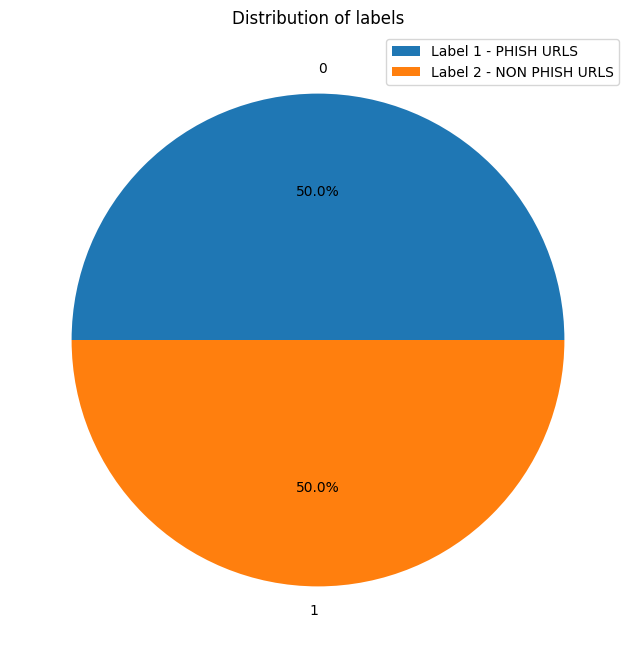

In [346]:
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=label_desc, autopct='%1.1f%%')
plt.title("Distribution of labels")
plt.legend(['Label 1 - PHISH URLS', 'Label 2 - NON PHISH URLS'], loc='upper right')
plt.show()

In [347]:
df_urls['URL_LENGTH'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).url_length)

ValueError: '.' does not appear to be an IPv4 or IPv6 address

In [ ]:
df_urls.head()

In [ ]:
grouped_by_length = df_urls[['URL_LENGTH', 'URL']].groupby(['URL_LENGTH']).count()
grouped_by_length

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(grouped_by_length.index, grouped_by_length['URL'], color='green')
plt.title("Distribution of url lengths")
plt.xlabel("Url length")
plt.ylabel("Number of urls with that length")
plt.legend(['Number of urls with that length'], loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_urls['label'], df_urls['URL_LENGTH'], marker='.')
plt.title("Distribution of url lengths")
plt.xlabel("Labels of data")
plt.ylabel("Urls lengths")
plt.legend(['Lengths of urls grouped by label'], loc='upper center')
plt.show()

In [ ]:
# Have @ in URL
df_urls['HAVE_@'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_at_sign() else 0)

In [ ]:
legitimate_and_have_at_filter = (df_urls['HAVE_@'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_have_at_filter = (df_urls['HAVE_@'] == 0) & (df_urls['label'] == 0)
phish_and_have_at_filter = (df_urls['HAVE_@'] == 1) & (df_urls['label'] == 1)
phish_and_not_have_at_filter = (df_urls['HAVE_@'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_have_at_filter]), len(df_urls[legitimate_and_not_have_at_filter])]
values2 = [len(df_urls[phish_and_have_at_filter]), len(df_urls[phish_and_not_have_at_filter])]

In [ ]:
plt.figure(figsize=(12, 6))
# Dane
categories = ['Have @', 'Not Have @']

index = range(len(categories))
width = 0.45


plt.bar(index, values1, width, label='NON PHISH')
plt.bar([index[0] + width, index[1] + width], values2, width, label='PHISH')


# Dodanie etykiet, tytułu itp.
plt.xlabel('Kategorie')
plt.ylabel('Wartości')
plt.title('Wykres słupkowy dla dwóch kategorii')
plt.xticks([i + width / 2 for i in index], categories)
plt.legend()

# Wyświetlenie wykresu
plt.show()

In [ ]:
df_urls['HAVE_IP'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_ip_address() else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
mean_url_length = (df_urls['URL'].apply(lambda url: len(url)).sum()/len(df_urls['URL'])).__floor__()
mean_url_length

In [ ]:
df_urls['LONGER_THAN_MEAN'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).url_longer_than(mean_url_length) else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
@measure_time
def collect_chars():
    df = pd.DataFrame()
    for char in PatternCollector.chars:
        df[char] = pd.DataFrame.from_dict(df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_characters().get(char)))
    return df

In [ ]:
df = collect_chars()

In [ ]:
df_urls = df_urls.merge(df, on=df_urls.index, how='left')

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['HAVE_HTTPS'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_https() else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['ABNORMAL_URL'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).abnormal_url else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['DIGITS_AMOUNT'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_digits())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['LETTERS_AMOUNT'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_letters())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [348]:
df_urls['PATH_DEPTH'] =  df_urls['URL'].apply(lambda url: FeatureExtraction(url).path_depth())

ValueError: '.' does not appear to be an IPv4 or IPv6 address

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['DOTS_IN_NETLOC'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).dots_in_netloc())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['NETLOC_LEN'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).netloc_length())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['HAVE_SHORTENING_PATTERNS'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_shortening_patterns() else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['HAVE_JS_CODE'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_javascript_code() else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls

#### Learning Models

In [ ]:
X = df_urls.drop(['key_0', 'URL', 'label'], axis=1)
y = df_urls['label']

In [349]:
X.head()

,URL_LENGTH,HAVE_@,HAVE_IP,LONGER_THAN_MEAN,!,@,#,$,%,^,...,_,HAVE_HTTPS,ABNORMAL_URL,DIGITS_AMOUNT,LETTERS_AMOUNT,PATH_DEPTH,DOTS_IN_NETLOC,NETLOC_LEN,HAVE_SHORTENING_PATTERNS,HAVE_JS_CODE
0,37,0,0,0,0,0,0,0,0,0,...,0,0,1,0,32,3,0,0,0,0
1,65,0,0,1,0,0,0,0,0,0,...,0,0,1,5,50,1,0,0,0,0
2,45,0,0,0,0,0,0,0,0,0,...,0,1,0,13,25,1,2,36,0,0
3,33,0,0,0,0,0,0,0,0,0,...,0,1,0,7,19,3,1,8,0,0
4,31,0,0,0,0,0,0,0,0,0,...,0,1,0,0,25,1,2,22,0,0


In [350]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (171589, 43)
X_test shape:  (73539, 43)
y_train shape:  (171589,)
y_test shape:  (73539,)


In [352]:
# RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [353]:
y_pred = clf.predict(X_test)

In [354]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9319272766831205


In [355]:
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

Precision:  0.9371675806762753


In [356]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier(random_state=42)
extra_trees_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_extra_trees = extra_trees_classifier.predict(X_test)

# Calculate the accuracy of the ExtraTrees model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("ExtraTrees Classifier Accuracy:", accuracy_extra_trees)

ExtraTrees Classifier Accuracy: 0.932199241218945
